In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/microsoft-stock-data/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-04-14,0.099826,0.101563,0.099826,0.100694,0.062686,12153600
1,1986-04-15,0.100694,0.100694,0.097222,0.100694,0.062686,9302400
2,1986-04-16,0.100694,0.105035,0.099826,0.104167,0.064848,31910400
3,1986-04-17,0.104167,0.105035,0.104167,0.105035,0.065388,22003200
4,1986-04-18,0.105035,0.105035,0.100694,0.101563,0.063227,21628800
...,...,...,...,...,...,...,...
9055,2022-03-16,289.109985,294.570007,283.200012,294.390015,290.894073,37826300
9056,2022-03-17,293.290009,295.609985,289.369995,295.220001,291.714233,30816600
9057,2022-03-18,295.369995,301.000000,292.730011,300.429993,296.862335,43390600
9058,2022-03-21,298.890015,300.140015,294.899994,299.160004,295.607422,28351200


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-04-14,0.100694
1,1986-04-15,0.100694
2,1986-04-16,0.104167
3,1986-04-17,0.105035
4,1986-04-18,0.101563
...,...,...
9055,2022-03-16,294.390015
9056,2022-03-17,295.220001
9057,2022-03-18,300.429993
9058,2022-03-21,299.160004


In [3]:
df['Date']

0       1986-04-14
1       1986-04-15
2       1986-04-16
3       1986-04-17
4       1986-04-18
           ...    
9055    2022-03-16
9056    2022-03-17
9057    2022-03-18
9058    2022-03-21
9059    2022-03-22
Name: Date, Length: 9060, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,1986-04-14,0.100694
1,1986-04-15,0.100694
2,1986-04-16,0.104167
3,1986-04-17,0.105035
4,1986-04-18,0.101563
...,...,...
9055,2022-03-16,294.390015
9056,2022-03-17,295.220001
9057,2022-03-18,300.429993
9058,2022-03-21,299.160004


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/tmp/ipykernel_32/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-04-14
1      1986-04-15
2      1986-04-16
3      1986-04-17
4      1986-04-18
          ...    
9055   2022-03-16
9056   2022-03-17
9057   2022-03-18
9058   2022-03-21
9059   2022-03-22
Name: Date, Length: 9060, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-04-14,0.100694
1986-04-15,0.100694
1986-04-16,0.104167
1986-04-17,0.105035
1986-04-18,0.101563
...,...
2022-03-16,294.390015
2022-03-17,295.220001
2022-03-18,300.429993


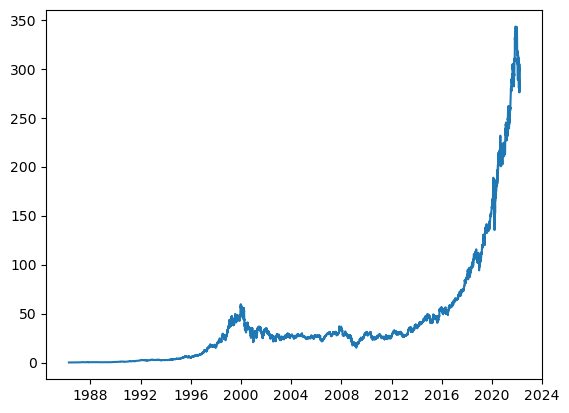

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])